In [329]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
import joblib
from sklearn.model_selection import cross_validate
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV

## Cargue de datos

In [330]:
train = pd.read_csv("s3://german-credit-20221001/datos/train/train.csv")
test = pd.read_csv("s3://german-credit-20221001/datos/test/test.csv")

## Creación de pipeline

In [331]:
numeric_pipeline = Pipeline(
    [
        ('Imputación con la media', SimpleImputer(strategy='mean')),
        ('Escalado minmax', MinMaxScaler())
    ]
)

In [332]:
categorical_pipeline = Pipeline(
    [
        ('Imputación con la moda', SimpleImputer(strategy='most_frequent')),
        ('Escalado OneHotEncoder', OneHotEncoder(sparse=False))
    ]
)

In [333]:
column_transformer = ColumnTransformer(
    [
        ("numeric pipeline", numeric_pipeline, [0,1,2]),
        ("categorical pipeline", categorical_pipeline, [3,4,5])
    ]
)

In [334]:
features = ["Age","Credit amount","Duration", "Sex","Purpose","Housing"]

## Selección de carácteristicas

In [335]:
train = train.dropna()

In [336]:
X_train = train.drop(["Risk","Unnamed: 0"], axis=1)

In [337]:
y_train = train["Risk"]

In [338]:
y_train = (y_train=='good').astype("int")

In [339]:
X_train = X_train.dropna()

In [340]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 361 entries, 0 to 699
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               361 non-null    int64 
 1   Sex               361 non-null    object
 2   Job               361 non-null    int64 
 3   Housing           361 non-null    object
 4   Saving accounts   361 non-null    object
 5   Checking account  361 non-null    object
 6   Credit amount     361 non-null    int64 
 7   Duration          361 non-null    int64 
 8   Purpose           361 non-null    object
dtypes: int64(4), object(5)
memory usage: 28.2+ KB


In [341]:
X_train = pd.get_dummies(X_train)

In [342]:
X_train

,Age,Job,Credit amount,Duration,Sex_female,Sex_male,Housing_free,Housing_own,Housing_rent,Saving accounts_little,...,Checking account_moderate,Checking account_rich,Purpose_business,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others
0,31,2,4473,36,0,1,0,1,0,1,...,0,1,0,0,0,0,0,1,0,0
5,36,1,4241,24,0,1,0,1,0,1,...,1,0,1,0,0,0,0,0,0,0
6,35,3,6948,36,0,1,0,0,1,1,...,1,0,0,1,0,0,0,0,0,0
7,24,2,2145,36,0,1,0,1,0,1,...,0,0,1,0,0,0,0,0,0,0
10,30,2,639,12,0,1,0,1,0,1,...,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
692,26,2,4788,48,0,1,0,1,0,1,...,0,0,0,1,0,0,0,0,0,0
693,36,2,1275,24,0,1,0,1,0,0,...,0,1,1,0,0,0,0,0,0,0
694,37,1,1274,12,1,0,0,1,0,1,...,0,0,0,1,0,0,0,0,0,0
695,41,1,5954,42,1,0,0,1,0,1,...,1,0,1,0,0,0,0,0,0,0


## Decision tree classifier

In [343]:
model = DecisionTreeClassifier()

In [344]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [345]:
## Devuelve la variación de la entropia o en indice gini y el que tenga más es relevante
model.feature_importances_

array([0.12774559, 0.04064761, 0.33895049, 0.18351519, 0.0182134 ,
       0.01025807, 0.03182209, 0.0056199 , 0.02397041, 0.0056199 ,
       0.02410856, 0.01864187, 0.01925574, 0.02505021, 0.02247961,
       0.00599456, 0.        , 0.05723785, 0.        , 0.00760165,
       0.01406313, 0.01092759, 0.00827658, 0.        ])

In [346]:
X_train.columns

Index(['Age', 'Job', 'Credit amount', 'Duration', 'Sex_female', 'Sex_male',
       'Housing_free', 'Housing_own', 'Housing_rent', 'Saving accounts_little',
       'Saving accounts_moderate', 'Saving accounts_quite rich',
       'Saving accounts_rich', 'Checking account_little',
       'Checking account_moderate', 'Checking account_rich',
       'Purpose_business', 'Purpose_car', 'Purpose_domestic appliances',
       'Purpose_education', 'Purpose_furniture/equipment', 'Purpose_radio/TV',
       'Purpose_repairs', 'Purpose_vacation/others'],
      dtype='object')

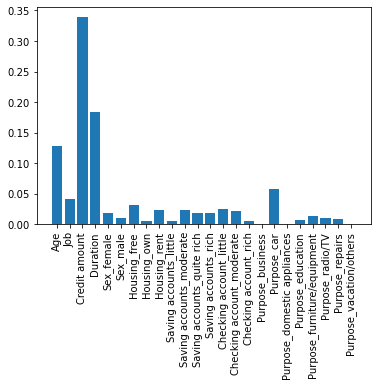

In [347]:
plt.bar(x=X_train.columns, height=model.feature_importances_)
plt.xticks(rotation=90)
plt.show()

In [348]:
ordered_columns = X_train.columns[np.argsort(model.feature_importances_)[::-1]]

In [349]:
ordered_importance = np.sort(model.feature_importances_)[::-1]

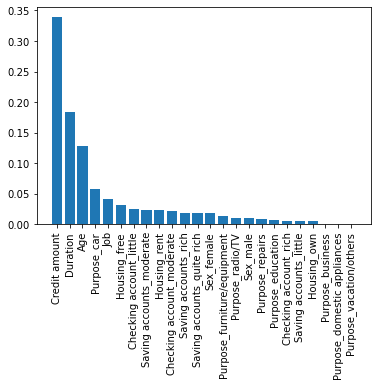

In [350]:
plt.bar(x=ordered_columns, height=ordered_importance)
plt.xticks(rotation=90)
plt.show()

### Regresión logística

In [351]:
from sklearn.linear_model import LogisticRegression

In [352]:
X_train_scaled = MinMaxScaler().fit_transform(X_train)

In [353]:
model = LogisticRegression()

In [354]:
model.fit(X_train_scaled, y_train)

LogisticRegression()

In [355]:
model.coef_

array([[ 0.47424606,  0.46040332, -0.92624159, -2.03116232, -0.19687034,
         0.19696162,  0.06881668,  0.14613817, -0.21486357, -0.46689979,
        -0.41031105,  0.29891103,  0.57839108, -0.38283643, -0.16388134,
         0.54680905,  0.28173634,  0.11494351, -0.14531633, -0.93147024,
         0.17853055,  0.27162217,  0.07962265,  0.15042262]])

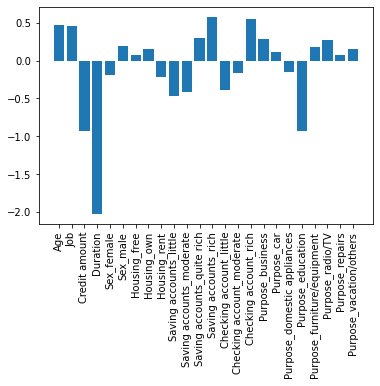

In [356]:
plt.bar(x=X_train.columns, height=model.coef_[0])
plt.xticks(rotation=90)
plt.show()

### Evaluación de modelos

In [357]:
train = pd.read_csv("s3://german-credit-20221001/datos/train/train.csv")
X_train = train.drop(["Risk","Unnamed: 0"], axis=1)
y_train = train["Risk"]
y_train = (y_train=='good').astype("int")

## Decision tree classifier

In [358]:
final_pipeline = Pipeline(
    [
        ('Preprocesamiento', column_transformer),
        ('Modelo de predicción de Árbol', DecisionTreeClassifier())
    ]
)

In [359]:
X_train = train[features]

In [360]:
results = cross_validate(final_pipeline,
                        X_train, y_train, cv=10, return_train_score=True,
                        scoring=["accuracy","f1"])

In [361]:
print("train: ",results["train_accuracy"].mean(), "+-", results["train_accuracy"].std())
print("test: ",results["test_accuracy"].mean(), "+-", results["test_accuracy"].std())

train:  1.0 +- 0.0
test:  0.6442857142857142 +- 0.04354214472608048


## SVM

In [362]:
final_pipeline = Pipeline(
    [
        ('Preprocesamiento', column_transformer),
        ('Modelo de predicción de Random forest', SVC())
    ]
)

In [363]:
results = cross_validate(final_pipeline,
                        X_train, y_train, cv=10, return_train_score=True,
                        scoring=["accuracy","f1"])

In [364]:
print("train: ",results["train_accuracy"].mean(), "+-", results["train_accuracy"].std())
print("test: ",results["test_accuracy"].mean(), "+-", results["test_accuracy"].std())

train:  0.7284126984126985 +- 0.004679175546978951
test:  0.7085714285714285 +- 0.011428571428571436


## Random forest

In [365]:
final_pipeline = Pipeline(
    [
        ('Preprocesamiento', column_transformer),
        ('Modelo de predicción de Random forest', RandomForestClassifier())
    ]
)

In [366]:
results = cross_validate(final_pipeline,
                        X_train, y_train, cv=10, return_train_score=True,
                        scoring=["accuracy","f1"])

In [367]:
print("train: ",results["train_accuracy"].mean(), "+-", results["train_accuracy"].std())
print("test: ",results["test_accuracy"].mean(), "+-", results["test_accuracy"].std())

train:  1.0 +- 0.0
test:  0.68 +- 0.05078968238466051


## Ajuste de hiperparámetros Random Forest

In [368]:
#Probar con 50, 100 y 200 arboles con alturas 2,3,5,10 con 10 experimentos
grid = {'max_depth':[2,3,5,10], 'n_estimators':[50,100, 200]}

In [369]:
grid_search = GridSearchCV(
    RandomForestClassifier(),
    param_grid=grid,
    cv=10,
    scoring="accuracy"
)

In [370]:
X_train_transformed = column_transformer.fit_transform(X_train)

In [371]:
grid_search.fit(X_train_transformed, y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [2, 3, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [372]:
#Mejor score con los hiperparámetros
grid_search.best_score_

0.7171428571428572

In [373]:
#Mejores hiperparámetros
grid_search.best_params_

{'max_depth': 5, 'n_estimators': 200}

In [374]:
#Se muestran los resultados de los experimentos
grid_search.cv_results_

{'mean_fit_time': array([0.0863035 , 0.15297546, 0.30115681, 0.07814777, 0.15477283,
        0.30785384, 0.08141913, 0.16098628, 0.32153447, 0.089399  ,
        0.17540329, 0.35035195]),
 'std_fit_time': array([0.00093298, 0.00365056, 0.00136593, 0.00068894, 0.00100534,
        0.00158859, 0.00065366, 0.0010512 , 0.00159974, 0.00104025,
        0.00096639, 0.00148661]),
 'mean_score_time': array([0.00519834, 0.00835099, 0.01581118, 0.00450945, 0.00832782,
        0.0159687 , 0.0045866 , 0.00846426, 0.01608074, 0.00487959,
        0.00895243, 0.01706643]),
 'std_score_time': array([3.23880845e-04, 2.30100418e-04, 2.45382631e-04, 2.68889230e-05,
        1.18382553e-04, 5.22040029e-04, 3.58821467e-05, 9.32891442e-05,
        1.52681488e-04, 8.97102457e-05, 1.28118780e-04, 1.81114554e-04]),
 'param_max_depth': masked_array(data=[2, 2, 2, 3, 3, 3, 5, 5, 5, 10, 10, 10],
              mask=[False, False, False, False, False, False, False, False,
                    False, False, False, False]

In [375]:
#Exportando el modelo
joblib.dump(final_pipeline,'rf_processing.joblib')

['rf_processing.joblib']